In [1]:
import pandas as pd
from datetime import datetime as dt
from datetime import datetime as date
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

## Q - 1.Which store/s has good quarterly growth rate in Q3’2012?

In [2]:
df = pd.read_csv("WALMART_SALES_DATA.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


#### From the below plot we can see like how the weekly sales of different stores has been distributed

Text(0, 0.5, 'Weekly_Sales_total')

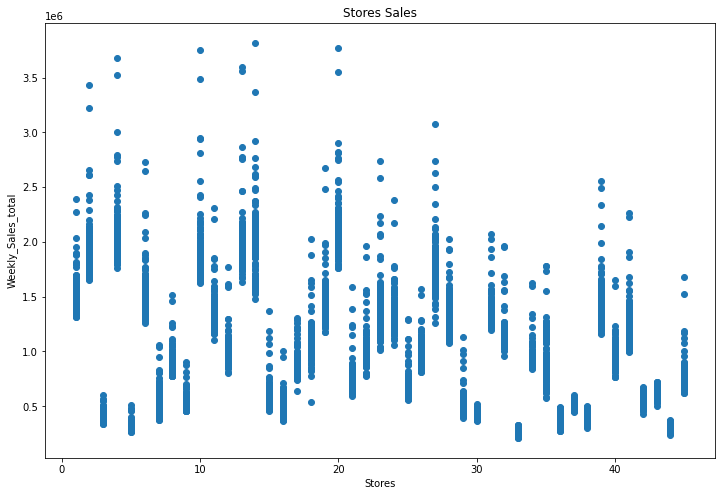

In [4]:
fig, ax = plt.subplots(figsize=(12,8))
X = df['Store']
Y = df['Weekly_Sales']
plt.scatter(X,Y)
plt.title('Stores Sales')
plt.xlabel('Stores')
plt.ylabel('Weekly_Sales_total')

In [5]:
# For the simplicity of calculating the growth or decline of Q3, adding three more columns so that data can be easily retrieved

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

In [6]:
# Date column has been converted to datetime format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Quarter       6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 553.1 KB


In [9]:
Q3_date_from = pd.Timestamp(date(2012,7,1))
Q3_date_to = pd.Timestamp(date(2012,9,30))
Q2_date_from = pd.Timestamp(date(2012,4,1))
Q2_date_to = pd.Timestamp(date(2012,6,30))

#Collecting the data of Q3 and Q2 from original dataset.
Q2data=df[(df['Date'] > Q2_date_from) & (df['Date'] < Q2_date_to)]
Q3data=df[(df['Date'] > Q3_date_from) & (df['Date'] < Q3_date_to)]

#finding the sum weekly sales of each store in Q2
Q2 = pd.DataFrame(Q2data.groupby('Store')['Weekly_Sales'].sum())
Q2.reset_index(inplace=True)
Q2.rename(columns={'Weekly_Sales': 'Q2_Weekly_Sales'},inplace=True)

#finding the sum weekly sales of each store in Q3
Q3 = pd.DataFrame(Q3data.groupby('Store')['Weekly_Sales'].sum())
Q3.reset_index(inplace=True)
Q3.rename(columns={'Weekly_Sales': 'Q3_Weekly_Sales'},inplace=True)

#mergeing Q2 and Q3 data on Store as a common column
Q3_Growth= Q2.merge(Q3,how='inner',on='Store')

# Growth rate formula is defined as the ratio of difference in present value to past value by past value whole multiplied with 100 (since it is in percentage)
# ((Present value — Past value )/Past value )*100
#Calculating Growth rate of each Store and collecting it into a dataframe  
Q3_Growth['Growth_Rate'] =((Q3_Growth['Q3_Weekly_Sales'] - Q3_Growth['Q2_Weekly_Sales'])/Q3_Growth['Q2_Weekly_Sales'])*100
Q3_Growth['Growth_Rate']=round(Q3_Growth['Growth_Rate'],2)
Q3_Growth.sort_values('Growth_Rate',ascending=False).head()

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
15,16,6626133.44,6441311.11,-2.79
6,7,7613593.92,7322393.92,-3.82
34,35,10753570.97,10252122.68,-4.66
25,26,13218289.66,12417575.35,-6.06
38,39,20191585.63,18899955.17,-6.40


In [10]:
# We can see that store 14 has the worst Q3 as the sales decreased by almost 18%

Q3_Growth.sort_values('Growth_Rate',ascending=False).tail(1)

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
13,14,24427769.06,20140430.4,-17.55


## Q - 2.which store has maximum weekly sales?

In [11]:
# Simply calculating which store has maximum weekly sales and hence Store 20 has maximum sales in the 3 years

maximum_sale = df.groupby(['Store'])['Weekly_Sales'].sum()

In [12]:
maximum_sale.sort_values(ascending = False)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

## Q - 3.Do holidays have impact on sales? negative or positive?

In [13]:
holiday_data = pd.DataFrame(df.groupby(['Holiday_Flag'])['Weekly_Sales'].mean())

In [14]:
# From the below matrix it is easily descirnible that Holiday has a positive impact on Weekly sales

holiday_data

,Weekly_Sales
Holiday_Flag,
0,1.041256e+06
1,1.122888e+06


Text(0, 0.5, 'Sales_total')

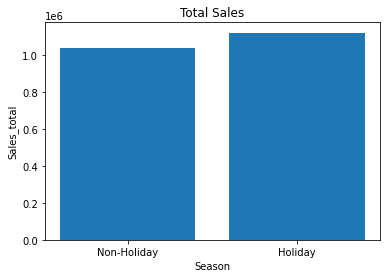

In [15]:
fig, ax = plt.subplots(figsize=(6,4))
X = ['Non-Holiday','Holiday']
Y = holiday_data['Weekly_Sales']
plt.bar(X,Y)
plt.title('Total Sales')
plt.xlabel('Season')
plt.ylabel('Sales_total')

## Q - 4.Draw scatter plot of monthly sales and provide your observations

#### From the below observations it is clearly discernible that the sales in the last month that is December is highest.

In [16]:
df[df['Weekly_Sales'] > 3500000.90]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter
475,4,2010-12-24,3526713.39,0,43.21,2.887,126.983581,7.127,2010,12,4
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143,2011,12,4
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003,2010,12,4
1762,13,2010-12-24,3595903.20,0,34.90,2.846,126.983581,7.795,2010,12,4
1814,13,2011-12-23,3556766.03,0,24.76,3.186,129.984548,6.392,2011,12,4
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.544590,8.724,2010,12,4
2763,20,2010-12-24,3766687.43,0,25.17,3.141,204.637673,7.484,2010,12,4
2815,20,2011-12-23,3555371.03,0,40.19,3.389,212.236040,7.082,2011,12,4


Text(0, 0.5, 'Weekly_Sales_total')

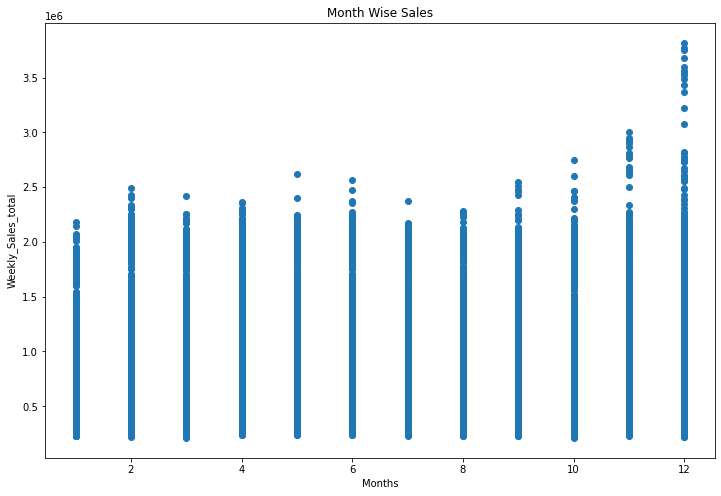

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
X = df['Month']
Y = df['Weekly_Sales']
plt.scatter(X,Y)
plt.title('Month Wise Sales')
plt.xlabel('Months')
plt.ylabel('Weekly_Sales_total')

## Q - 5.1 Can you predict Weekly Sales using other columns, either with a Random Forest Algorithm or a Support Vector Machine? 

In [18]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Quarter         0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Quarter       6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 553.1 KB


In [20]:
y = df['Weekly_Sales']
X = df.drop(['Store','Date','Weekly_Sales','Quarter','Year','Month'],axis = 1)

In [21]:
# Considering the 5 predictors shown below we'll fit the random forest regressor model
X

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0,42.31,2.572,211.096358,8.106
1,1,38.51,2.548,211.242170,8.106
2,0,39.93,2.514,211.289143,8.106
3,0,46.63,2.561,211.319643,8.106
4,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...
6430,0,64.88,3.997,192.013558,8.684
6431,0,64.89,3.985,192.170412,8.667
6432,0,54.47,4.000,192.327265,8.667
6433,0,56.47,3.969,192.330854,8.667


In [22]:
# Splitting the data into training and testing with 80 : 20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
regressor = RandomForestRegressor(n_estimators = 50, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [25]:
y_pred=regressor.predict(X_test)

In [26]:
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 377124.5409612029
Mean Squared Error: 278023571208.8212
Root Mean Squared Error: 527279.4052576122


In [27]:
Actual_vs_Pred = pd.DataFrame({"Actual Sales" : y_test, "Predicted Sales": y_pred})
Actual_vs_Pred

,Actual Sales,Predicted Sales
2535,1049772.04,1.081193e+06
1364,1745841.33,9.241822e+05
3569,664745.20,1.517987e+06
575,270281.63,3.578854e+05
1557,1320239.51,8.677924e+05
...,...,...
4849,973250.41,1.006475e+06
3395,1326370.08,1.235157e+06
3375,1246242.61,1.276311e+06
3739,2024554.10,1.940714e+06


## Q - 5.2 Sometimes predictions from other columns is challenging. In that case, model Weekly Sales column for years 2010 and 2011 with pymc3 and use that model to predict sales for every month in 2012. It's ok if your histogram is not exactly simgle-humped, as long as a single hump is a sufficiently good approximation.

In [28]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

In [29]:
mean_df = df[(df['Year']==2010) | (df['Year']==2011)]
mean = mean_df['Weekly_Sales'].mean()
maximum = mean_df['Weekly_Sales'].max()
minimum = mean_df['Weekly_Sales'].min()
mean

1052685.806168889

C:\Users\divya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

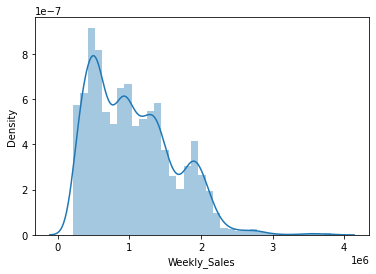

In [30]:
sns.distplot(mean_df['Weekly_Sales'])

C:\Users\divya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

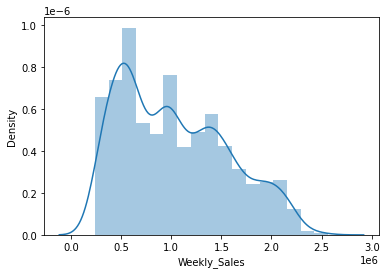

In [50]:
df_2012 = df[(df['Year']==2012)]
sns.distplot(df_2012['Weekly_Sales'])

In [31]:
sd = mean_df['Weekly_Sales'].std()
sd

575836.982368499

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from pymc3 import StudentT, Normal
from pymc3 import Model, Uniform ,Exponential
RANDOM_SEED = 20090425


with Model() as weeksales_model:
    μ_0 = Normal('μ_0', mean, sd)
    ν = Exponential('ν_minus_one', 1/29.) + 1

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [33]:
with weeksales_model:
    σ_0 = Uniform('σ_0', lower=minimum, upper=maximum)
    sales = StudentT('sales', nu=ν, mu=μ_0, lam=σ_0**2, observed=df['Weekly_Sales'])

In [34]:
# from pymc3 import Deterministic
# import numpy as np    
# with weeksales_model:
#     diff_of_means = Deterministic('difference of means', μ_1 - μ_0)
#     effect_size = Deterministic('effect size', diff_of_means / np.sqrt((σ_1**2 + σ_0**2) / 2))

In [37]:
from pymc3 import fit

with weeksales_model: 
    weeksales_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Finished [100%]: Average Loss = 764.83


In [39]:
import pymc3 as pm
Y_pred = pm.sample_posterior_predictive(weeksales_trace, samples=1000, model=weeksales_model)

In [46]:
Y_pred_list = list(Y_pred.values())
Y_pred_list[0]

array([[1052684.22655214, 1052684.22654241, 1052684.22654245, ...,
        1052684.22654688, 1052684.22655554, 1052684.22653967],
       [1052681.63854377, 1052681.6385443 , 1052681.63854618, ...,
        1052681.63854886, 1052681.63855042, 1052681.63854417],
       [1052684.54728084, 1052684.54728066, 1052684.54727909, ...,
        1052684.5472773 , 1052684.54727513, 1052684.54727968],
       ...,
       [1052679.79101226, 1052679.79100476, 1052679.79100469, ...,
        1052679.79100518, 1052679.79100224, 1052679.79101111],
       [1052685.34866725, 1052685.34867636, 1052685.34867794, ...,
        1052685.34868076, 1052685.34867557, 1052685.34867547],
       [1052687.28034512, 1052687.28034608, 1052687.28034365, ...,
        1052687.28034347, 1052687.2803429 , 1052687.28034377]])

(array([[  1.,  17.,  60., 142., 248., 273., 165.,  71.,  18.,   5.],
        [  1.,  17.,  60., 142., 248., 273., 165.,  71.,  18.,   5.],
        [  1.,  17.,  60., 142., 248., 273., 165.,  71.,  18.,   5.],
        [  1.,  17.,  60., 142., 248., 273., 165.,  71.,  18.,   5.],
        [  1.,  17.,  60., 142., 248., 273., 165.,  71.,  18.,   5.],
        [  1.,  17.,  60., 142., 248., 273., 165.,  71.,  18.,   5.],
        [  1.,  17.,  60., 142., 248., 273., 165.,  71.,  18.,   5.],
        [  1.,  17.,  60., 142., 248., 273., 165.,  71.,  18.,   5.],
        [  1.,  17.,  60., 142., 248., 273., 165.,  71.,  18.,   5.],
        [  1.,  17.,  60., 142., 248., 273., 165.,  71.,  18.,   5.]]),
 array([1052675.12567137, 1052677.21666596, 1052679.30766055,
        1052681.39865513, 1052683.48964972, 1052685.58064431,
        1052687.6716389 , 1052689.76263348, 1052691.85362807,
        1052693.94462266, 1052696.03561725]),
 <a list of 10 BarContainer objects>)

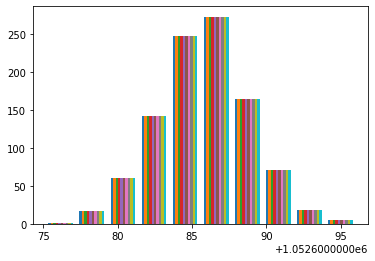

In [51]:
plt.hist((Y_pred_list[0]))

C:\Users\divya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

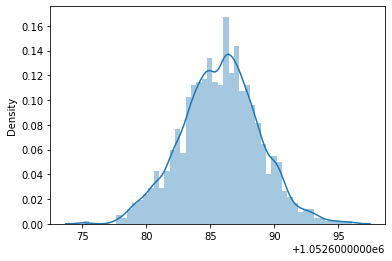

In [48]:
sns.distplot(Y_pred_list[0])